# Gráficos para análise das transações feitas

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from extrair_dados import exibir_dados_transacoes


## Definindo o Data Frame

In [2]:
dfTransacoes = exibir_dados_transacoes()
dfTransacoes

c:\Users\pedro\Documents\Estudos\Projetos\analise-transacoes-bancarias\analise\extrair_dados.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfTransacoes = pd.read_sql(query, conn)


,Id,RemetenteId,DestinatarioId,Quantia,DataHora,Tipo
0,1,1117,577,3149.73,2025-02-05 21:29:07,PIX
1,2,4615,4615,1185.25,2025-04-01 09:56:15,Saque
2,3,4779,4779,5338.97,2025-02-27 02:29:05,Saque
3,4,3576,3576,1255.69,2025-01-27 17:00:00,Saque
4,5,1959,875,9658.03,2025-01-25 15:06:32,Transferência
...,...,...,...,...,...,...
9995,9996,4540,4540,8926.21,2025-03-13 15:52:18,Depósito
9996,9997,1429,449,4468.62,2025-02-10 20:57:57,Transferência
9997,9998,4710,3190,8003.48,2025-03-06 05:54:13,PIX
9998,9999,403,403,2577.10,2025-02-13 17:24:05,Depósito


## Renomeando as colunas

In [3]:
dfTransacoes.rename(columns={
    "Id": "ID",
    "RemetenteId": "Conta Origem",
    "DestinatarioId": "Conta Destino",
    "Quantia": "Valor (R$)",
    "DataHora": "Data e Hora",
    "Tipo": "Tipo de Transação"
}, inplace=True)

dfTransacoes

,ID,Conta Origem,Conta Destino,Valor (R$),Data e Hora,Tipo de Transação
0,1,1117,577,3149.73,2025-02-05 21:29:07,PIX
1,2,4615,4615,1185.25,2025-04-01 09:56:15,Saque
2,3,4779,4779,5338.97,2025-02-27 02:29:05,Saque
3,4,3576,3576,1255.69,2025-01-27 17:00:00,Saque
4,5,1959,875,9658.03,2025-01-25 15:06:32,Transferência
...,...,...,...,...,...,...
9995,9996,4540,4540,8926.21,2025-03-13 15:52:18,Depósito
9996,9997,1429,449,4468.62,2025-02-10 20:57:57,Transferência
9997,9998,4710,3190,8003.48,2025-03-06 05:54:13,PIX
9998,9999,403,403,2577.10,2025-02-13 17:24:05,Depósito


## Frequência por Tipo de Transação 

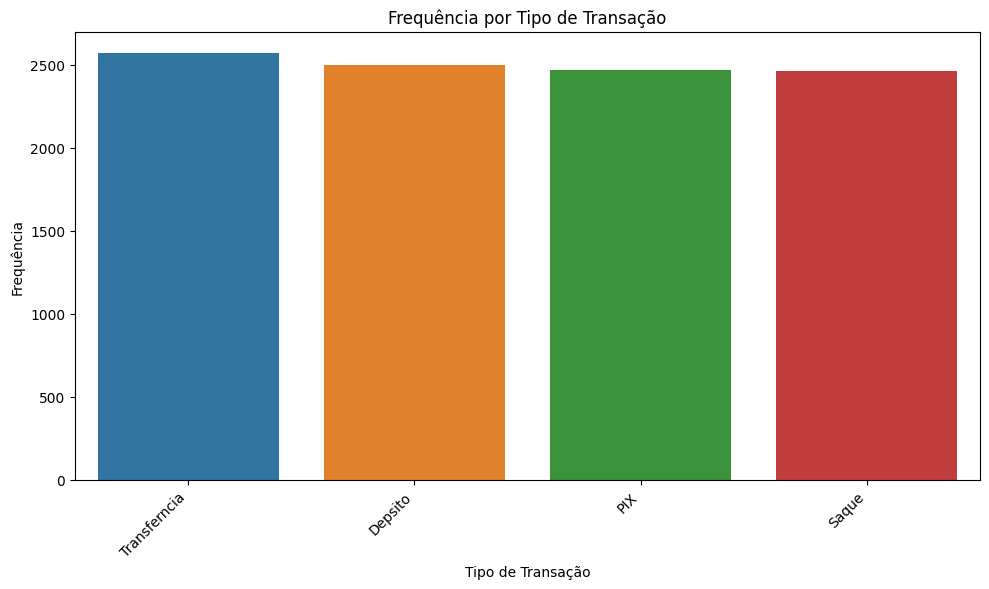

In [15]:
# Contagem de cada tipo de transação
transaction_counts = dfTransacoes['Tipo de Transação'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10,6)) # Define o tamanho da figura antes de criar o gráfico
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Frequência por Tipo de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()


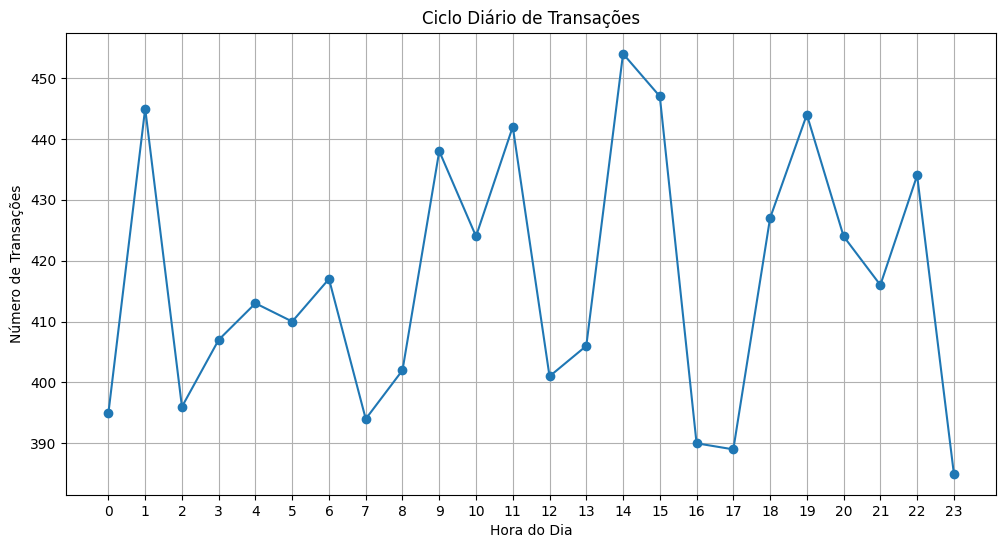

In [16]:
# Extrair a hora do dia
dfTransacoes['Hora do Dia'] = dfTransacoes['Data e Hora'].dt.hour

# Agrupar por hora do dia e contar as transações
hourly_transactions = dfTransacoes.groupby('Hora do Dia').size()

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(hourly_transactions.index, hourly_transactions.values, marker='o')
plt.title('Ciclo Diário de Transações')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Transações')
plt.xticks(range(24))
plt.grid(True)
